<h1> COVID-19 Twitter Dataset Analysis </h1>

**Dataset: COVID-19 Twitter Dataset with Latent Topics, Sentiments and Emotions Attributes**

<br>
<br>

@author Zeezee Canning, Daniel Garcia, Chai Ratnakaram

@version December 7, 2020


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

*Zeezee part below*

In [53]:
dataUnfiltered = pd.read_csv("randomized_sample.csv", index_col = "Unnamed: 0")
dataUnfiltered = dataUnfiltered[["tweet_ID", "user_ID", "t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10", "valence_intensity", "anger_intensity", "fear_intensity", "sadness_intensity",
             "joy_intensity", "sentiment_category", "emotion_category", "keyword_used"]].convert_dtypes()
dataUnfiltered.head(20)

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
8183,1224615942803664896,223101960,1,1,0,0,0,0,0,0,0,0,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan
1538,1224720188752433154,17818643,1,0,1,0,0,0,0,0,0,0,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan
8497,1224610619384528896,19383099,1,0,0,0,0,0,0,0,0,0,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan
2398,1224707720995069952,43381817,1,1,0,0,0,0,0,0,0,0,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan
9313,1224596331315986433,3002161959,1,0,0,1,0,0,0,0,0,0,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan
35,1224742927525507072,468328783,1,0,0,0,0,0,0,0,0,0,0.338,0.482,0.582,0.517,0.162,negative,fear,wuhan
680,1224732940233371649,711319983423414272,1,1,0,0,0,0,0,0,0,0,0.507,0.376,0.416,0.409,0.325,neutral,no specific emotion,wuhan
2400,1224707682013151234,3334888083,1,0,0,1,0,0,0,0,0,0,0.548,0.388,0.370,0.344,0.414,positive,joy,wuhan
5161,1224665758996815874,635140045,1,1,0,0,0,0,0,0,0,0,0.360,0.414,0.649,0.499,0.247,negative,fear,wuhan
8970,1224602175806021632,1045800102332264448,1,0,1,1,0,0,0,0,0,0,0.506,0.408,0.465,0.402,0.344,neutral,no specific emotion,wuhan


In [154]:
data = dataUnfiltered[dataUnfiltered["emotion_category"] != "no specific emotion"] # drop neutral emotions

## Do individuals feel negative emotions more intensely than positive ones?

### Breakdown of Emotional Intensities

In [110]:
meanIntensities = pd.Series.to_frame(data.loc[:,('anger_intensity', 'fear_intensity',
       'sadness_intensity', 'joy_intensity')].mean(), name = "Mean").reset_index()

In [111]:
meanIntensities

,index,Mean
0,anger_intensity,0.445374
1,fear_intensity,0.447205
2,sadness_intensity,0.418905
3,joy_intensity,0.297148


In [114]:
countEmotions = pd.Series.to_frame(data["emotion_category"].value_counts(), name = "num_occurences").reset_index()

In [115]:
countEmotions

,index,num_occurences
0,anger,205483
1,fear,197249
2,joy,190320
3,sadness,39415


In [133]:
intensities_df = meanIntensities.merge(countEmotions, how = "left", on = meanIntensities.index ).drop(columns = ["index_y", "key_0"])
intensities_df = intensities_df.rename(columns = {"index_x": "emotions", "Mean": "mean"}).set_index("emotions")

In [139]:
intensities_df

,mean,num_occurences
emotions,,
anger_intensity,0.445374,205483
fear_intensity,0.447205,197249
sadness_intensity,0.418905,190320
joy_intensity,0.297148,39415


#### Visualizing the Intensities

**Number of Occurences:**

<AxesSubplot:ylabel='emotions'>

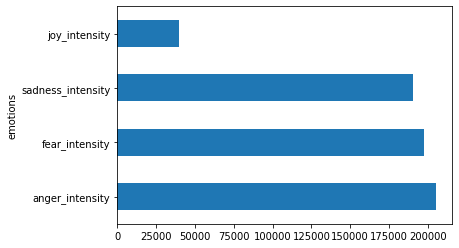

In [141]:
intensities_df["num_occurences"].plot.barh()

<u>Dropping outlier (`joy_intensity`)</u>

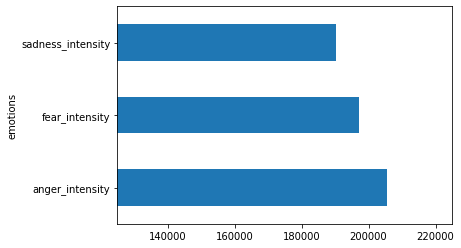

In [150]:
intensities_df["num_occurences"].drop("joy_intensity").plot.barh()
plt.xlim(125000, 225000)
plt.show()

**Means:**

<AxesSubplot:ylabel='emotions'>

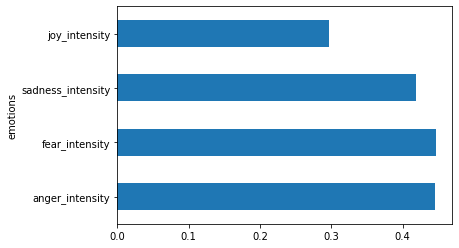

In [153]:
intensities_df["mean"].plot.barh()

### All records with Negative Valence Intensity

In [35]:
negative_valence = data[data["valence_intensity"] < 0.5]

In [36]:
negative_valence.head(20)

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
8183,1224615942803664896,223101960,1,1,0,0,0,0,0,0,0,0,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan
1538,1224720188752433154,17818643,1,0,1,0,0,0,0,0,0,0,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan
8497,1224610619384528896,19383099,1,0,0,0,0,0,0,0,0,0,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan
2398,1224707720995069952,43381817,1,1,0,0,0,0,0,0,0,0,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan
9313,1224596331315986433,3002161959,1,0,0,1,0,0,0,0,0,0,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan
35,1224742927525507072,468328783,1,0,0,0,0,0,0,0,0,0,0.338,0.482,0.582,0.517,0.162,negative,fear,wuhan
5161,1224665758996815874,635140045,1,1,0,0,0,0,0,0,0,0,0.360,0.414,0.649,0.499,0.247,negative,fear,wuhan
2156,1224711405829607428,2935639364,0,0,0,1,0,0,0,0,0,0,0.395,0.400,0.529,0.399,0.208,negative,fear,wuhan
4720,1224673315513438209,7228352,1,0,0,0,0,0,0,0,0,0,0.355,0.497,0.612,0.504,0.240,negative,fear,wuhan
8129,1224616785242013696,2820507071,0,1,1,0,0,0,0,0,0,0,0.433,0.519,0.545,0.472,0.197,negative,fear,wuhan


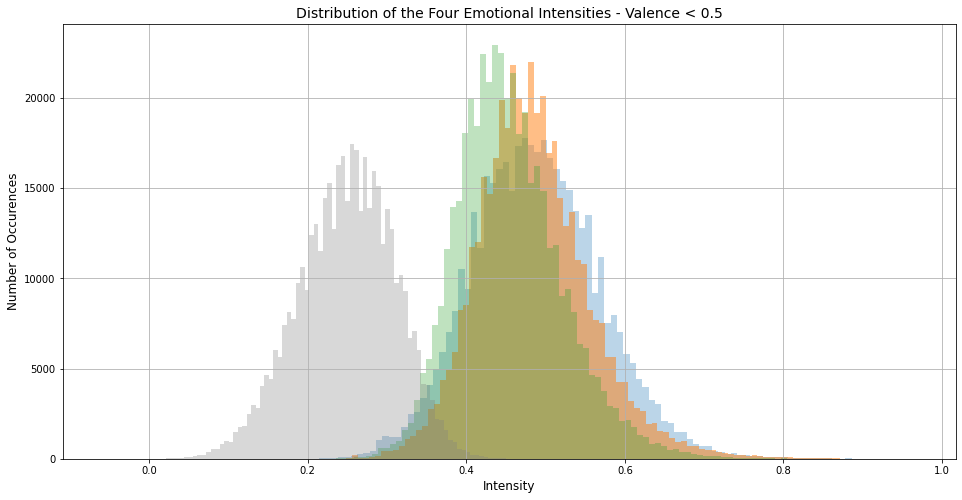

In [44]:
plt.figure(figsize = (16, 8))
plt.title("Distribution of the Four Emotional Intensities - Valence < 0.5", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
negative_valence["fear_intensity"].hist(bins = 100, alpha = 0.3) # blue
negative_valence["anger_intensity"].hist(bins = 100, alpha = 0.5) # orange
negative_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3) # green
negative_valence["joy_intensity"].hist(bins = 100, alpha = 0.3, color = "grey") # grey
plt.show()

### All records with Positive Valence Intensity

In [38]:
pos_valence = data[data["valence_intensity"] >= 0.5]

In [39]:
pos_valence.head(20)

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
2400,1224707682013151234,3334888083,1,0,0,1,0,0,0,0,0,0,0.548,0.388,0.370,0.344,0.414,positive,joy,wuhan
3131,1224697244378705925,2330878992,1,0,1,0,0,0,0,0,0,0,0.537,0.378,0.379,0.364,0.350,positive,joy,wuhan
2321,1224708876530061313,494732159,1,1,0,0,0,0,0,0,0,0,0.521,0.448,0.423,0.444,0.424,positive,joy,wuhan
4410,1224678668510924802,1202543449850798080,1,0,0,0,0,0,0,0,0,0,0.580,0.370,0.414,0.374,0.420,positive,joy,wuhan
8579,1224609172961910784,33879571,1,0,0,0,0,0,0,0,0,0,0.538,0.305,0.300,0.358,0.438,positive,joy,wuhan
5366,1224662390895190023,785926171,1,1,0,0,0,0,0,0,0,0,0.564,0.353,0.478,0.352,0.366,positive,joy,wuhan
2423,1224707345550319625,845755284429533184,1,1,1,1,1,0,0,0,0,0,0.717,0.187,0.227,0.231,0.552,very positive,joy,wuhan
2793,1224701643834281984,3346139542,1,1,0,0,0,0,0,0,0,0,0.597,0.299,0.309,0.260,0.378,positive,joy,wuhan
9135,1224599593872084992,2977895316,0,0,0,0,1,1,0,0,0,0,0.539,0.295,0.343,0.386,0.373,positive,joy,wuhan
6135,1224650353515192320,16220179,1,1,1,0,0,0,0,0,0,0,0.541,0.408,0.418,0.338,0.430,positive,joy,wuhan


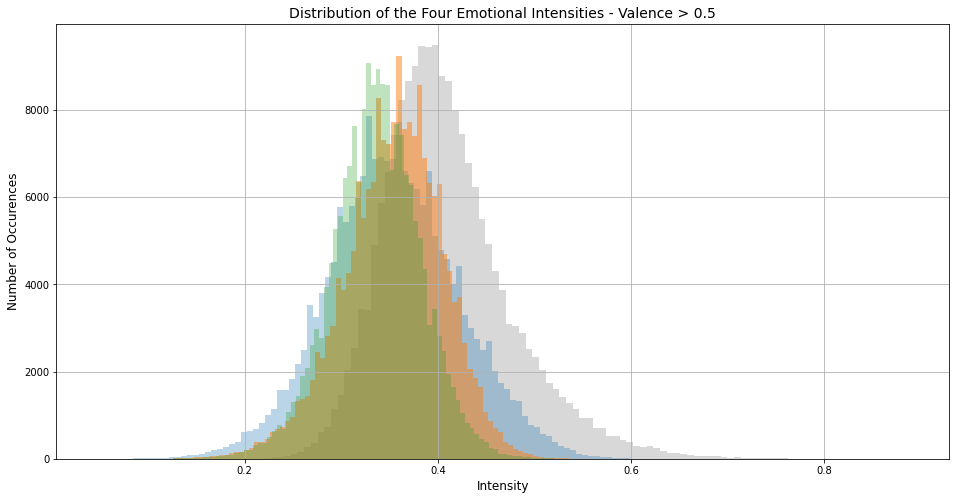

In [45]:
plt.figure(figsize = (16, 8))
plt.title("Distribution of the Four Emotional Intensities - Valence > 0.5", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
pos_valence["joy_intensity"].hist(bins = 100, alpha = 0.3, color = "grey") # grey
pos_valence["fear_intensity"].hist(bins = 100, alpha = 0.3) # blue
pos_valence["anger_intensity"].hist(bins = 100, alpha = 0.5) # orange
pos_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3) # green
plt.show()

**Comparison between Positive and Negative Valence Intensities (Using Means)**

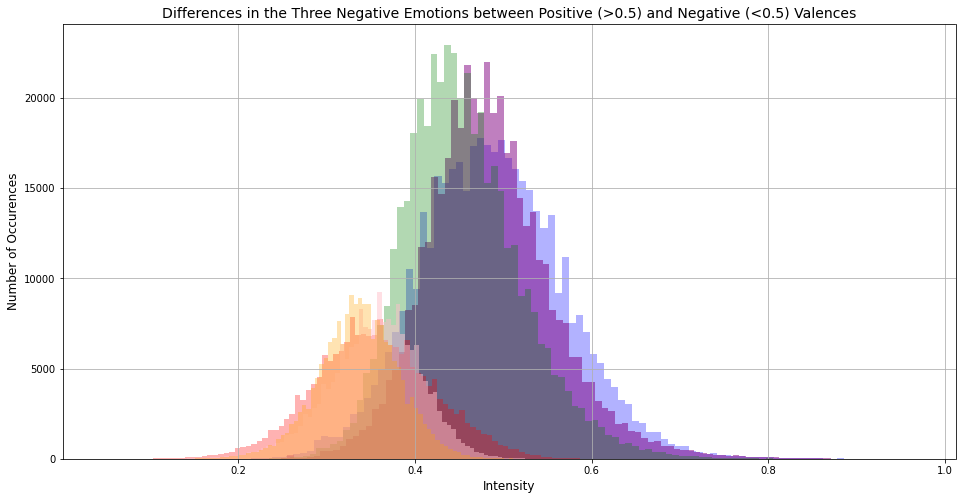

In [41]:
plt.figure(figsize = (16, 8))
plt.title("Differences in the Three Negative Emotions between Positive (>0.5) and Negative (<0.5) Valences", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
negative_valence["fear_intensity"].hist(bins = 100, alpha = 0.3, color = "blue") # blue
negative_valence["anger_intensity"].hist(bins = 100, alpha = 0.5, color = "purple") # orange
negative_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3, color = "green") # green
pos_valence["fear_intensity"].hist(bins = 100, alpha = 0.3, color = "red" ) # blue
pos_valence["anger_intensity"].hist(bins = 100, alpha = 0.5, color = "pink" ) # orange
pos_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3, color = "orange") # green

plt.show()

Negative Valence Intensity (i.e. Negative overall "mood") translates to a much greater intensity in all of the singular emotions. Likewise, Positive Valence Intensity (i.e. Positive "mood") does not seem to greatly affect the intensity of all the four emotions.

### Determining Topic Closeness

In [170]:
import statsmodels.formula.api as smf
from sklearn.cluster import AgglomerativeClustering as agglom
from sklearn.cluster import KMeans as kmeans

In [187]:
cluster = pd.Series(kmeans(n_clusters = 30).fit_predict(data.loc[:,"t1":"t10"]), index = data.index)

*Chai part below*

## Importing and Describing the Dataset

In [1]:
data = pd.read_csv("C:/Users/Ratnakaram/Desktop/randomized_sample.csv")
pd.set_option('display.max_columns', None)

NameError: name 'pd' is not defined

In [49]:
data.describe()

,Unnamed: 0,tweet_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,user_ID
count,7.564000e+05,7.564000e+05,756400.000000,756400.000000,756400.000000,756400.000000,756400.000000,756400.000000,756400.000000,756400.000000,756400.000000,756400.000000,756400.000000,756400.000000,756400.000000,756400.000000,756400.000000,7.564000e+05
mean,3.782000e+07,1.258180e+18,0.719582,0.505297,0.316761,0.226401,0.105911,0.096493,0.089170,0.081946,0.073653,0.082238,0.457534,0.437176,0.439640,0.411063,0.302449,3.922476e+17
std,2.183540e+07,1.619805e+16,0.449204,0.499972,0.465214,0.418502,0.307724,0.295266,0.284989,0.274283,0.261205,0.274728,0.096146,0.088341,0.098115,0.080979,0.092258,5.178374e+17
min,3.500000e+01,1.221965e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.058000,2.200000e+01
25%,1.890999e+07,1.244507e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.395000,0.380000,0.373000,0.357000,0.239000,2.097896e+08
50%,3.782001e+07,1.255413e+18,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.459000,0.434000,0.438000,0.406000,0.299000,2.257135e+09
75%,5.672997e+07,1.272130e+18,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.521000,0.492000,0.505000,0.461000,0.361000,9.610907e+17
max,7.563070e+07,1.289350e+18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909000,0.938000,0.966000,0.942000,0.887000,1.289321e+18


In [50]:
data.dtypes

Unnamed: 0              int64
tweet_ID                int64
t1                      int64
t2                      int64
t3                      int64
t4                      int64
t5                      int64
t6                      int64
t7                      int64
t8                      int64
t9                      int64
t10                     int64
valence_intensity     float64
anger_intensity       float64
fear_intensity        float64
sadness_intensity     float64
joy_intensity         float64
sentiment_category     object
emotion_category       object
keyword_used           object
user_ID                 int64
dtype: object

## Shape of the dataset

In [51]:
data.shape

(756400, 21)

* It contains 756400 rows and 21 columns

In [52]:
data.head(5)

,Unnamed: 0,tweet_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used,user_ID
0,8183,1224615942803664896,1,1,0,0,0,0,0,0,0,0,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan,223101960
1,1538,1224720188752433154,1,0,1,0,0,0,0,0,0,0,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan,17818643
2,8497,1224610619384528896,1,0,0,0,0,0,0,0,0,0,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan,19383099
3,2398,1224707720995069952,1,1,0,0,0,0,0,0,0,0,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan,43381817
4,9313,1224596331315986433,1,0,0,1,0,0,0,0,0,0,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan,3002161959


## Max and min in various columns

In [53]:
data['valence_intensity'].max()


0.909

In [54]:
data['anger_intensity'].max()

0.938

In [55]:
data['fear_intensity'].max()

0.966

In [56]:
data['sadness_intensity'].max()

0.942

In [57]:
data['joy_intensity'].max()

0.887

# Data Cleaning

* Droping null values if any in the dataset

In [58]:
data = data.dropna(axis = 0, how ='any') 

In [59]:
data.shape

(756400, 21)

## Data Visualization

### Word Cloud

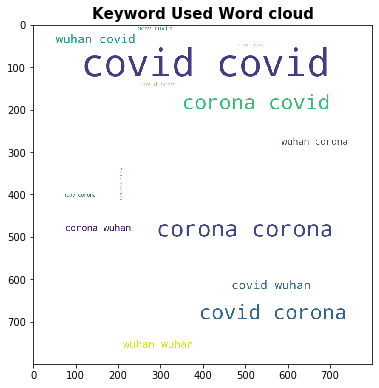

In [60]:
# This is the word cloud of the column named keyword_used to see which keyword is used most in that column
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data.keyword_used: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                         
plt.figure(figsize = (10, 5), facecolor = None) 
plt.imshow(wordcloud)  
plt.tight_layout(pad = 0) 
plt.title("Keyword Used Word cloud",fontsize=15,fontweight="bold") 
plt.show() 

### Word Cloud

* This is the second word cloud in the emotion category column to saw which type of emotion has come more via tweets

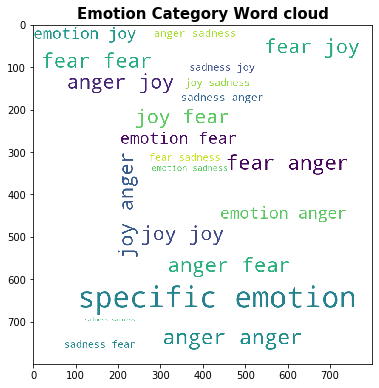

In [61]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data.emotion_category: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.tight_layout(pad = 0) 
plt.title("Emotion Category Word cloud",fontsize=15,fontweight="bold") 
plt.show() 

Text(0.5, 1.0, 'Sentiment Category vs Sadness intensity')

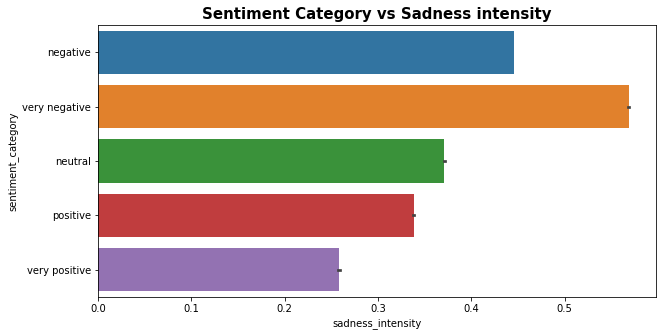

In [62]:
fig=plt.figure(figsize=(10,5))                #to specify thesize of the figure
sns.barplot(x="sadness_intensity", y="sentiment_category", data=data)  # giving x and y columns and data, plotting thorugh seaborn as barplot
plt.title("Sentiment Category vs Sadness intensity",fontsize=15,fontweight="bold")     #giving title of the figure through matplotlib 

* As from the above display of the barplot of two different columns named sadness intensity and sentiment category it is clearly shown that the number of very negative intensity is much more than the other categories

### PieChart

Text(0.5, 1.0, 'Sentiment Category in sadness intensity')

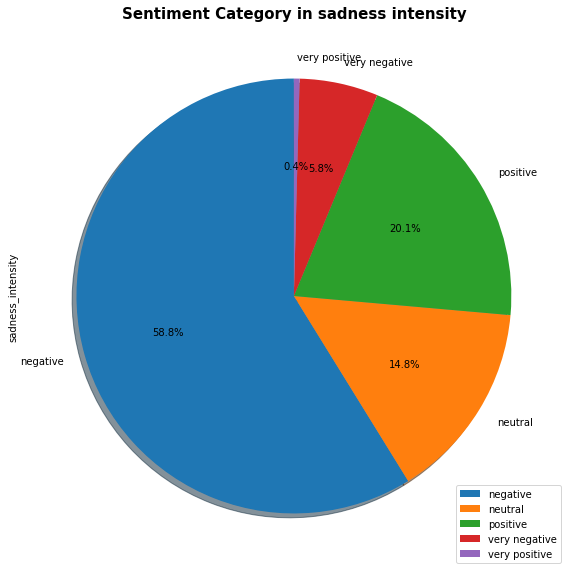

In [63]:
data.groupby(['sentiment_category']).sum().plot(kind='pie', y= 'sadness_intensity' , shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
plt.title("Sentiment Category in sadness intensity",fontsize=15,fontweight="bold") 

* We want to see the distribution of the data in terms of sentiment category. For this we have displayed piechart to see the distribution in terms of blocks and percentages. We came to know that the tweets having negative results are more than the other categories and having percentage of above 50%. 

Text(0.5, 1.0, 'Sentiment Category vs Valence intensity')

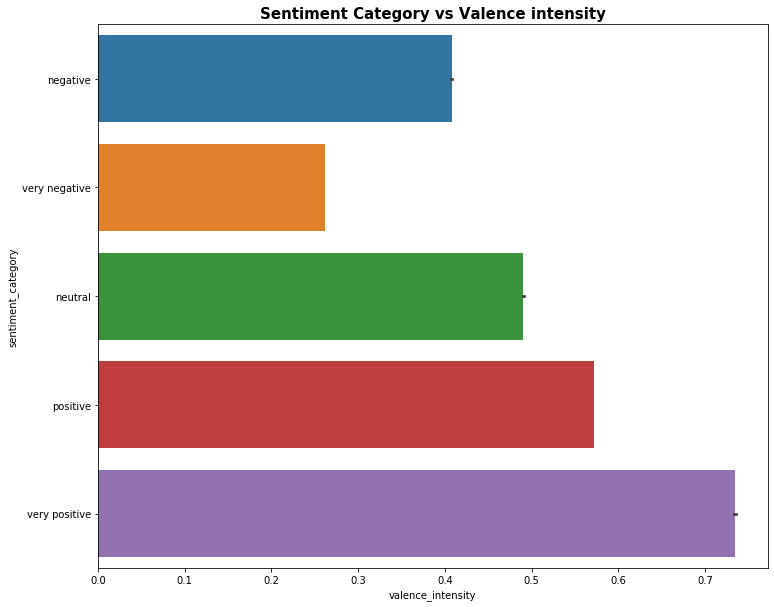

In [64]:
fig=plt.figure(figsize=(12,10))                #to specify thesize of the figure
sns.barplot(x="valence_intensity", y="sentiment_category", data=data)  # giving x and y columns and data, plotting thorugh seaborn as barplot
plt.title("Sentiment Category vs Valence intensity",fontsize=15,fontweight="bold")     #giving title of the figure through matplotlib 

### Hexbin chart

Text(0.5, 1.0, 'Sadness intensity against joy intensity')

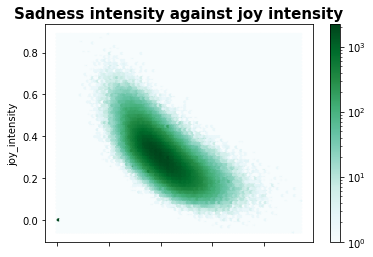

In [65]:
data.plot(kind='hexbin',x='sadness_intensity', bins='log',y='joy_intensity')
plt.title("Sadness intensity against joy intensity",fontsize=15,fontweight="bold") 

* For log function is used for creating bins.The deeper the color, the higher the density.

Text(0.5, 1.0, 'Emotion Category in joy intensity')

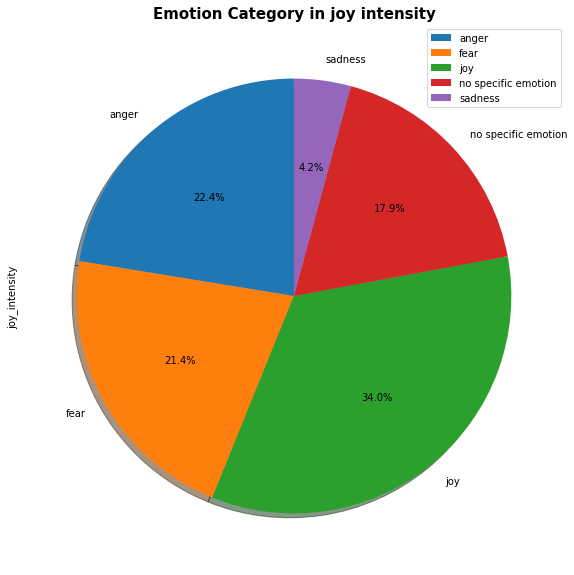

In [66]:
data.groupby(['emotion_category']).sum().plot(kind='pie', y= 'joy_intensity' , shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
plt.title("Emotion Category in joy intensity",fontsize=15,fontweight="bold") 

Text(0.5, 1.0, 'Emotion Category in fear intensity')

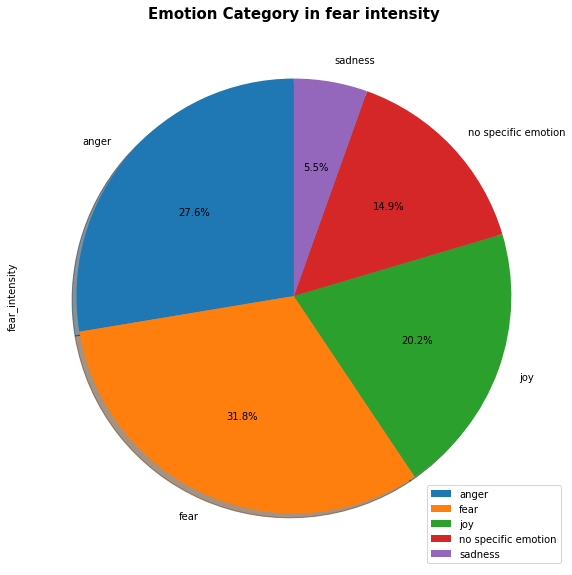

In [67]:

data.groupby(['emotion_category']).sum().plot(kind='pie', y= 'fear_intensity' , shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
plt.title("Emotion Category in fear intensity",fontsize=15,fontweight="bold") 

Text(0.5, 1.0, 'Emotion Category in joy intensity')

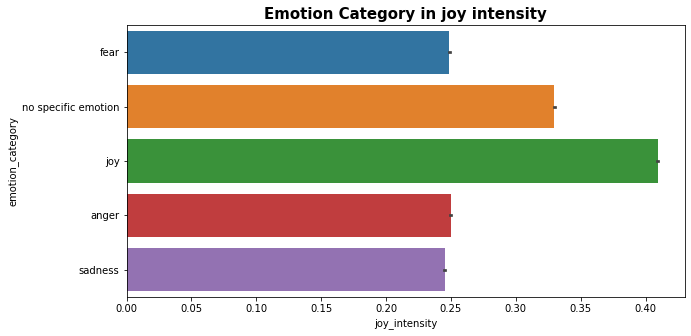

In [68]:
fig=plt.figure(figsize=(10,5))                #to specify thesize of the figure
sns.barplot(x="joy_intensity", y="emotion_category", data=data)  # giving x and y columns and data, plotting thorugh seaborn as barplot
plt.title("Emotion Category in joy intensity",fontsize=15,fontweight="bold")     #giving title of the figure through matplotlib 

Text(0.5, 1.0, 'Emotion Category in fear intensity')

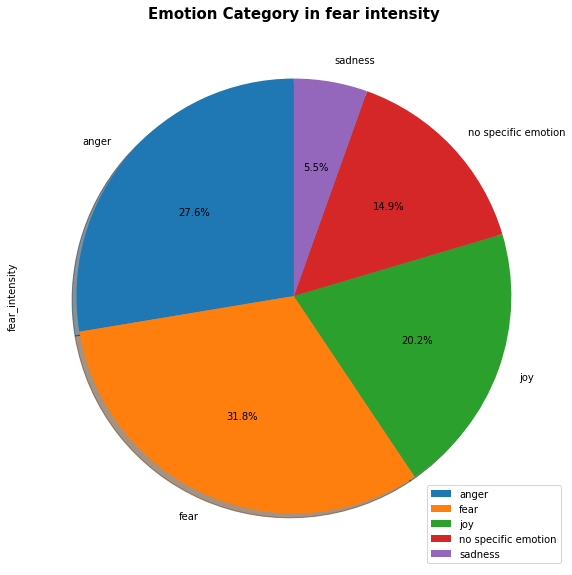

In [69]:
data.groupby(['emotion_category']).sum().plot(kind='pie', y= 'fear_intensity' , shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
plt.title("Emotion Category in fear intensity",fontsize=15,fontweight="bold") 

Text(0.5, 1.0, 'Emotion Category in valence intensity')

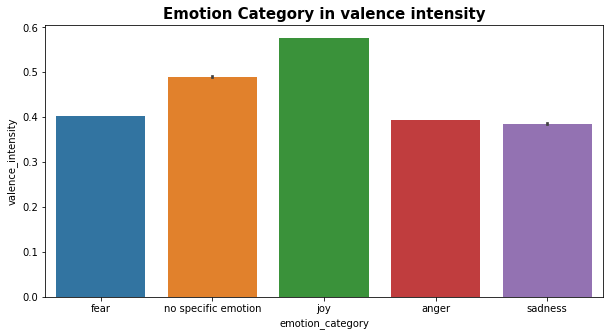

In [70]:
fig=plt.figure(figsize=(10,5))                #to specify thesize of the figure
sns.barplot(x="emotion_category", y="valence_intensity", data=data)  # giving x and y columns and data, plotting thorugh seaborn as barplot
plt.title("Emotion Category in valence intensity",fontsize=15,fontweight="bold")     #giving title of the figure through matplotlib 

*Daniel part below*

In [47]:
keyword_pivot = twitter_sentiment.pivot_table(index='keyword_used',columns='emotion_category',
                                              values='valence_intensity',aggfunc='mean')
keyword_pivot

emotion_category,anger,fear,joy,no specific emotion,sadness
keyword_used,,,,,
corona,0.391481,0.399542,0.576010,0.488255,0.383671
covid,0.395499,0.403073,0.576317,0.491349,0.386445
nCoV,0.391191,0.403657,0.571166,0.487827,0.388023
wuhan,0.394784,0.402798,0.573784,0.489171,0.391284


 The keyword with the most intense sensation of anger was <b>"covid"</b> touting an average anger intesity of <b>0.395499</b>
 <br> The keyword with the most intense sensation of fear was <b>"nCoV"</b> touting an average fear intensity of <b>0.403657</b>
 <br> The keyword with the most intense sensation of joy was <b>"covid"</b> touting an average joy intensity of <b>0.576317</b>
 <br> The keyword with the most intense sensation of sadness was <b>"wuhan"</b> touting an average sadness intensity of <b>0.391284</b>

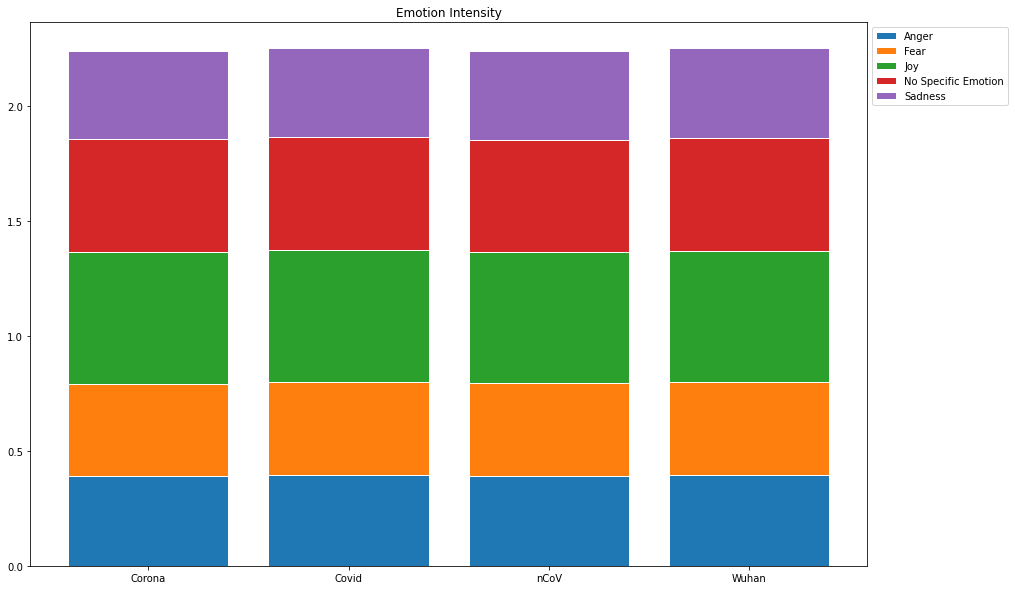

In [48]:
fig, ax = plt.subplots(figsize=(15,10))

anger = [keyword_pivot.iloc[0].iloc[0],keyword_pivot.iloc[1].iloc[0],
         keyword_pivot.iloc[2].iloc[0],keyword_pivot.iloc[3].iloc[0]]

fear = [keyword_pivot.iloc[0].iloc[1],keyword_pivot.iloc[1].iloc[1],
        keyword_pivot.iloc[2].iloc[1],keyword_pivot.iloc[3].iloc[1]]

joy = [keyword_pivot.iloc[0].iloc[2],keyword_pivot.iloc[1].iloc[2],
        keyword_pivot.iloc[2].iloc[2],keyword_pivot.iloc[3].iloc[2]]

no_emotion = [keyword_pivot.iloc[0].iloc[3],keyword_pivot.iloc[1].iloc[3],
        keyword_pivot.iloc[2].iloc[3],keyword_pivot.iloc[3].iloc[3]]

sadness = [keyword_pivot.iloc[0].iloc[4],keyword_pivot.iloc[1].iloc[4],
        keyword_pivot.iloc[2].iloc[4],keyword_pivot.iloc[3].iloc[4]]
    

x = ['Corona','Covid','nCoV','Wuhan']

ax.bar(x,anger,edgecolor='white',label='Anger')
ax.bar(x,fear,edgecolor='white',label='Fear',bottom=anger)
ax.bar(x,joy,edgecolor='white',label='Joy',bottom=[a+b for a,b in zip(anger,fear)])
ax.bar(x,no_emotion,edgecolor='white',label='No Specific Emotion',bottom=[a+b+c for a,b,c in zip(anger,fear,joy)])
ax.bar(x,sadness,label='Sadness',edgecolor='white',bottom=[a+b+c+d for a,b,c,d in zip(anger,fear,joy,no_emotion)])

ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set(title='Emotion Intensity')

plt.show()

As we can see from the above graph, the variations between  keywords and their respect emotion intensities are virtually non-existing. This suggests that there is little to no link between a specific word and a consequent emotion intensity.

In [49]:
quantified_sentiment_category = []
for i in twitter_sentiment['sentiment_category']:
    if i == 'very negative':
        quantified_sentiment_category.append(-2)
    elif i == 'very positive':
        quantified_sentiment_category.append(2)
    elif i == 'negative':
        quantified_sentiment_category.append(-1)
    elif i == 'positive':
        quantified_sentiment_category.append(1)
    elif i == 'neutral':
        quantified_sentiment_category.append(0)

In [50]:
quantified_sentiment_category = pd.DataFrame(quantified_sentiment_category)
quantified_sentiment_category.rename(columns={0:'sentiment_category_quantified'},inplace=True)
quantified_sentiment_category.head()

,sentiment_category_quantified
0,-1
1,-2
2,-1
3,-1
4,-1


In [51]:
twitter_sentiment = twitter_sentiment.merge(quantified_sentiment_category,how='left',left_index=True,right_index=True)
twitter_sentiment.head()

,Unnamed: 0,tweet_ID,t1,t2,t3,t4,t5,t6,t7,t8,...,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used,user_ID,sentiment_category_quantified
0,8183,1224615942803664896,1,1,0,0,0,0,0,0,...,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan,223101960,-1
1,1538,1224720188752433154,1,0,1,0,0,0,0,0,...,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan,17818643,-2
2,8497,1224610619384528896,1,0,0,0,0,0,0,0,...,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan,19383099,-1
3,2398,1224707720995069952,1,1,0,0,0,0,0,0,...,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan,43381817,-1
4,9313,1224596331315986433,1,0,0,1,0,0,0,0,...,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan,3002161959,-1


In [52]:
dummy_keywords = pd.get_dummies(twitter_sentiment['keyword_used'])
dummy_keywords = dummy_keywords.merge(twitter_sentiment['sentiment_category_quantified'],how='left',left_index=True,right_index=True)
dummy_keywords.head()

,corona,covid,nCoV,wuhan,sentiment_category_quantified
0,0,0,0,1,-1
1,0,0,0,1,-2
2,0,0,0,1,-1
3,0,0,0,1,-1
4,0,0,0,1,-1


In [53]:
reg_keywords = smf.ols('sentiment_category_quantified ~ wuhan+nCoV+covid+corona',dummy_keywords).fit()
print(reg_keywords.summary())

                                  OLS Regression Results                                 
Dep. Variable:     sentiment_category_quantified   R-squared:                       0.000
Model:                                       OLS   Adj. R-squared:                  0.000
Method:                            Least Squares   F-statistic:                     80.93
Date:                           Mon, 07 Dec 2020   Prob (F-statistic):           8.62e-69
Time:                                   17:30:44   Log-Likelihood:            -1.0103e+06
No. Observations:                         756400   AIC:                         2.021e+06
Df Residuals:                             756395   BIC:                         2.021e+06
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

This regression just further confirms what we can graphically observe relating valence intensity and specific keywords: there is no association between them and a model using this parameters has 0 predictive capability.

In [54]:
userID = twitter_sentiment.groupby('user_ID')[['valence_intensity']].mean().reset_index()

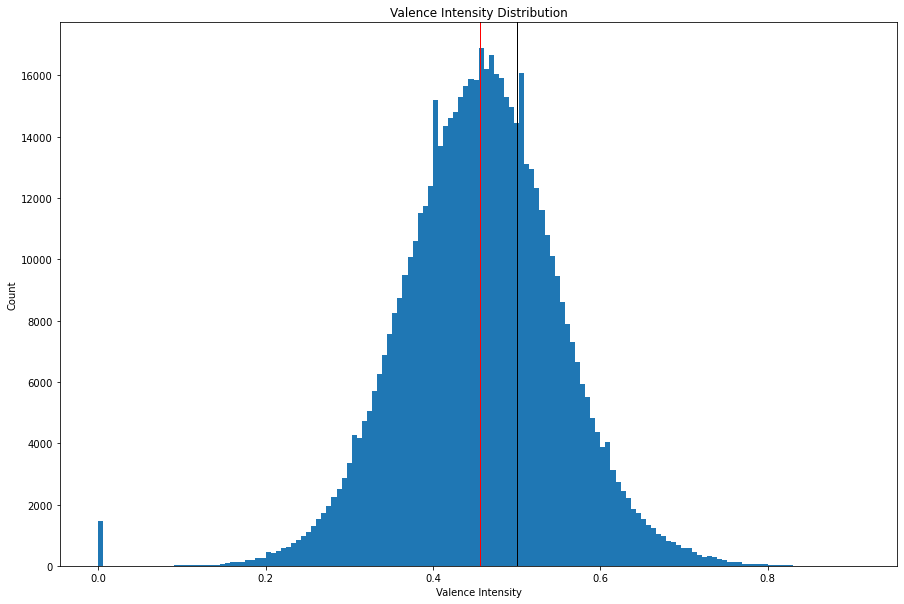

In [55]:
fig, ax = plt.subplots(figsize=(15,10))

x = userID['user_ID']
y = userID['valence_intensity']

ax.hist(y,bins=150)
ax.set(title='Valence Intensity Distribution',xlabel='Valence Intensity',ylabel='Count')
ax.axvline(x=userID['valence_intensity'].mean(),color='r',linewidth=1)
ax.axvline(x=.5,color='black',linewidth=1)

plt.show()

In [56]:
userID['valence_intensity'].mean()

0.4567145991982822

The above histogram illustrates how overall valence intensity is distributed. It appears to be mound shaped and symmetric, centered at 0.4567. There is a small peak at 0 intensity which isn't immediately understandable other than those tweets being entirely fact-transmitting in which case they wouldn't have a valence intensity assoicated to them. The vertical black line indicates a value of 0.5, which is a neutral intensity, whereas the red line is the mean of the distribution and it's located at 0.4567. Broadly, this suggests that the distribution of valence intensities is skewed towards negative emotion rather than positive emotion.  

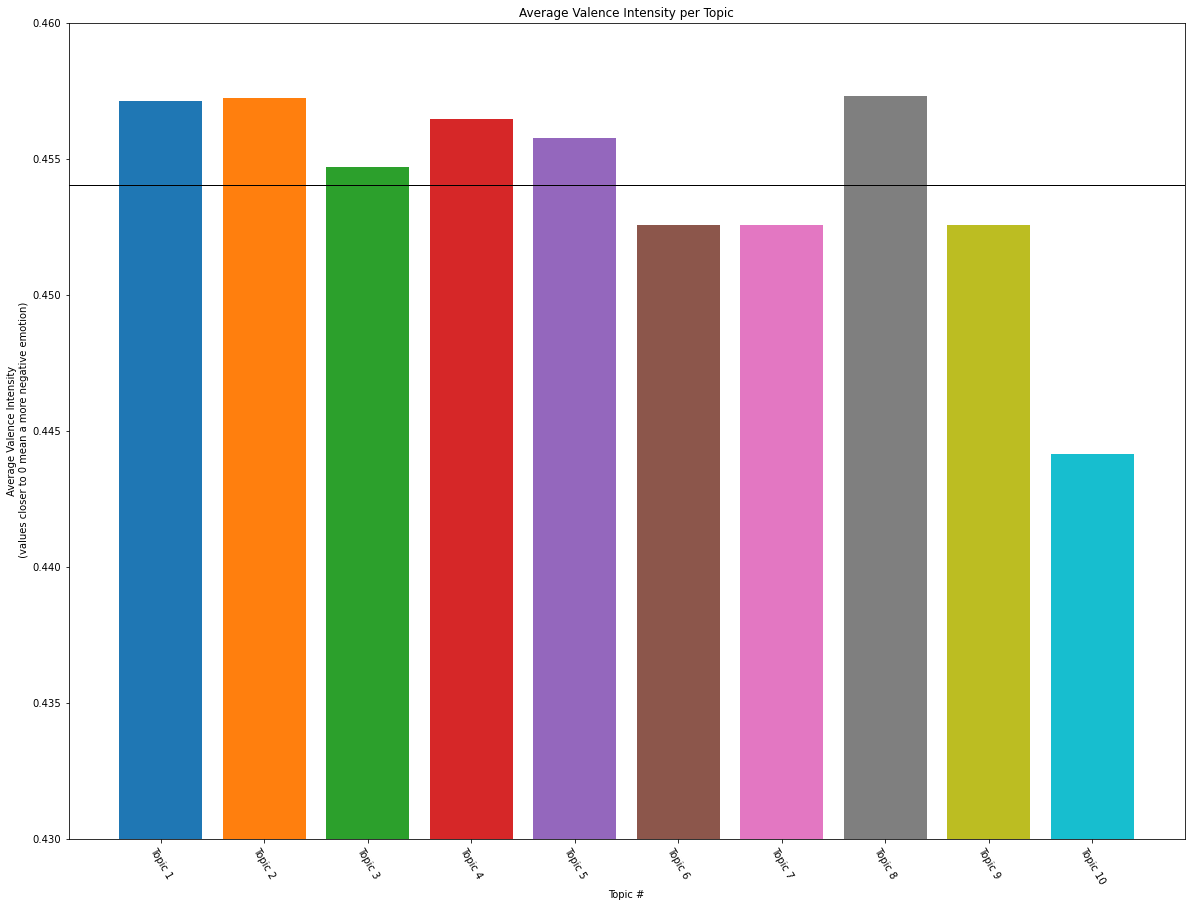

In [57]:
fig, ax = plt.subplots(figsize=(20,15))

topic1 = twitter_sentiment.groupby('t1')[['valence_intensity']].mean().iloc[1][0]
topic2 = twitter_sentiment.groupby('t2')[['valence_intensity']].mean().iloc[1][0]
topic3 = twitter_sentiment.groupby('t3')[['valence_intensity']].mean().iloc[1][0]
topic4 = twitter_sentiment.groupby('t4')[['valence_intensity']].mean().iloc[1][0]
topic5 = twitter_sentiment.groupby('t5')[['valence_intensity']].mean().iloc[1][0]
topic6 = twitter_sentiment.groupby('t6')[['valence_intensity']].mean().iloc[1][0]
topic7 = twitter_sentiment.groupby('t7')[['valence_intensity']].mean().iloc[1][0]
topic8 = twitter_sentiment.groupby('t8')[['valence_intensity']].mean().iloc[1][0]
topic9 = twitter_sentiment.groupby('t9')[['valence_intensity']].mean().iloc[1][0]
topic10 = twitter_sentiment.groupby('t10')[['valence_intensity']].mean().iloc[1][0]

ax.bar('Topic 1',topic1)
ax.bar('Topic 2',topic2)
ax.bar('Topic 3',topic3)
ax.bar('Topic 4',topic4)
ax.bar('Topic 5',topic5)
ax.bar('Topic 6',topic6)
ax.bar('Topic 7',topic7)
ax.bar('Topic 8',topic8)
ax.bar('Topic 9',topic9)
ax.bar('Topic 10',topic10)

ax.set_ylim(bottom=.43,top=.46)
plt.setp(ax.get_xticklabels(),rotation=300)
ax.set(title='Average Valence Intensity per Topic',xlabel='Topic #',ylabel=' Average Valence Intensity \n (values closer to 0 mean a more negative emotion)')
ax.axhline(y=((topic1+topic2+topic3+topic4+topic5+topic6+topic7+topic8+topic9+topic10)/10),linewidth=1,color='black')

plt.show()

In [58]:
topic_content = [['Topic 1','people, cases, new, deaths, time, china, realdonaldtrump, lockdown, trump'],
                ['Topic 2','health, help, people, need, think, vaccine, care, fight, support'],
                ['Topic 3','pandemic, f**k, months, killed, question, wait, looks, trump, impact'],
                ['Topic 4','pay, donate, lie, focus, song, gates, page, google, caused'],
                ['Topic 5','florida, drink, named, nature, marketing, pr, ncdcgov, farmers, cr'],
                ['Topic 6','rules, bed, drtedros, speaks, privacy, parliament, physicians, strength, joke'],
                ['Topic 7','dies, pmoindia, ndtv, ai, narendramodi, mohfwindia, shoot, drharshvardhan,battle'],
                ['Topic 8','ye, ke, behaviour, brought, hidden, yup, smell, zerohedge, odds'],
                ['Topic 9','excuse, humanity, salary, wind, gtgt, rats, ice, beard, mosque'],
                ['Topic 10','internet, allah, teacher, dance, el, rona, weed, crush, fk']]

tc_df = pd.DataFrame(topic_content,columns=['topic_#','topic_content'])
print('Words Included in Each Topic:')
for i in range(0,10): 
    print(tc_df['topic_#'].iloc[i],':',tc_df['topic_content'].iloc[i])

Words Included in Each Topic:
Topic 1 : people, cases, new, deaths, time, china, realdonaldtrump, lockdown, trump
Topic 2 : health, help, people, need, think, vaccine, care, fight, support
Topic 3 : pandemic, f**k, months, killed, question, wait, looks, trump, impact
Topic 4 : pay, donate, lie, focus, song, gates, page, google, caused
Topic 5 : florida, drink, named, nature, marketing, pr, ncdcgov, farmers, cr
Topic 6 : rules, bed, drtedros, speaks, privacy, parliament, physicians, strength, joke
Topic 7 : dies, pmoindia, ndtv, ai, narendramodi, mohfwindia, shoot, drharshvardhan,battle
Topic 8 : ye, ke, behaviour, brought, hidden, yup, smell, zerohedge, odds
Topic 9 : excuse, humanity, salary, wind, gtgt, rats, ice, beard, mosque
Topic 10 : internet, allah, teacher, dance, el, rona, weed, crush, fk


The graph shown above shows the average valence intensity for each topic included within the study. Values closer to 0 indicate a high intensity for unpleasant feelings whereas values closer to 1 indicate a high intensity for pleasent feelings. The horizontal line illustrates the average valence intensity across all 10 topics. Topics 1,2,3,4, and 8 are topics which are "more positive" than average while topics 6,7,9, and 10 are "more negative" than average. Most topics don't swing too far away from the average with exception of topic 10 which is 0.0098 points below the average. It is also important to note that all topics have a valence intensity below 0.5 or neutral, which is consistent with the findings from the histogram suggesting that overall emotion is more negative than positive.    

In [59]:
dummy_emotion = pd.get_dummies(twitter_sentiment['emotion_category'])
dummy_emotion.head()

,anger,fear,joy,no specific emotion,sadness
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [60]:
dummy_emotion = dummy_emotion.merge(twitter_sentiment['sentiment_category_quantified'],how='left',left_index=True,right_index=True)
dummy_emotion.head()

,anger,fear,joy,no specific emotion,sadness,sentiment_category_quantified
0,0,1,0,0,0,-1
1,0,1,0,0,0,-2
2,0,1,0,0,0,-1
3,0,1,0,0,0,-1
4,0,1,0,0,0,-1


In [62]:
reg_emotion = smf.ols('sentiment_category_quantified ~ fear+anger+joy+sadness',dummy_emotion).fit()
print(reg_emotion.summary())

                                  OLS Regression Results                                 
Dep. Variable:     sentiment_category_quantified   R-squared:                       0.947
Model:                                       OLS   Adj. R-squared:                  0.947
Method:                            Least Squares   F-statistic:                 3.353e+06
Date:                           Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                                   17:32:51   Log-Likelihood:                 97698.
No. Observations:                         756400   AIC:                        -1.954e+05
Df Residuals:                             756395   BIC:                        -1.953e+05
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

This model on the other, appears to have tremendous predictive power when it relates the quantified column of sentiment category to specific emotions. <br><br> If we're going to run through this taking all necessary statistical steps we first have to conduct a test of hypothesis where H0: β1=β2=β3=β4=0 (where βi is the slope of a given xi variable). If the null hypothesis is true, this means that no β has a relationship with our value of y. <br><br>Our alternative hypothesis is as follows, Ha: β1=β2=β3=β4≠0. If the alternative hypothesis is true, this means that at least one β has a relationship with y. <br><br> To confirm which hypothesis is correct we look to "Prob (F-statistic)" in our OLS Regression Results, since our p-value is smaller than any reasonable α (.05 or .01) we can reject the null hypothesis, concluding that there's statistically significant evidence in favor of at least one β having a relationship with y <br><br> We can now look at the model's predictive ability, which for multiple regression is defined by the Adjusted R-squared (since this metric takes into account the amount of independent variables the model is using) to conclude that approximately 94.7% of the variation in y can be explained away by variation in our independent variables. <br><br> We can further decompose our model by independent variable as follows: <br><p style="text-indent: 40px">β1: The average quantified value of sentiment category is -1.0473 when fear is present, holding all other variables constant</p><br><p style="text-indent: 40px">β2: The average quantified value of sentiment category is -1.0840 when anger is present, holding all other variables constant</p><br><p style="text-indent: 40px">β3: The average quantified value of sentiment category is 1.0265 when joy is present, holding all other variables constant</p><br><p style="text-indent: 40px">β4: The average quantified value of sentiment category is -1.1349 when sadness is present, holding all other variables constant</p><br>Unsurprisingly, joy contributes positive emotion. What's more interesting however, is to look at which negative emotion contributes the most to the quantified value of sentiment category, which our model suggests is sadness since the average value of that is closer to -2 (the most extreme value of negative emotion) than any other emotion. From there, it appears to be that anger contributes more towards negative emotion than fear since |β1|>|β2|

In [68]:
dummy_valence = dummy_emotion.merge(twitter_sentiment['valence_intensity'],how='left',left_index=True,right_index=True)
dummy_valence.head()

,anger,fear,joy,no specific emotion,sadness,sentiment_category_quantified,valence_intensity
0,0,1,0,0,0,-1,0.475
1,0,1,0,0,0,-2,0.294
2,0,1,0,0,0,-1,0.427
3,0,1,0,0,0,-1,0.473
4,0,1,0,0,0,-1,0.431


In [69]:
reg_dummy_valence = smf.ols('valence_intensity ~ fear+anger+joy+sadness',dummy_valence).fit()
print(reg_dummy_valence.summary())

                            OLS Regression Results                            
Dep. Variable:      valence_intensity   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 3.275e+05
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:57:24   Log-Likelihood:             1.0782e+06
No. Observations:              756400   AIC:                        -2.156e+06
Df Residuals:                  756395   BIC:                        -2.156e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4906      0.000   2969.105      0.0

This model on the other, appears to have some predictive power when it relates the valence intensity to specific emotions. <br><br> We need to conduct a test of hypothesis where H0: β1=β2=β3=β4=0 (where βi is the slope of a given xi variable). If the null hypothesis is true, this means that no β has a relationship with our value of y. <br><br>Our alternative hypothesis is as follows, Ha: β1=β2=β3=β4≠0. If the alternative hypothesis is true, this means that at least one β has a relationship with y. <br><br> To confirm which hypothesis is correct we look to "Prob (F-statistic)" in our OLS Regression Results, since our p-value is smaller than any reasonable α (.05 or .01) we can reject the null hypothesis, concluding that there's statistically significant evidence in favor of at least one β having a relationship with y <br><br> We can now look at the model's predictive ability, which for multiple regression is defined by the Adjusted R-squared (since this metric takes into account the amount of independent variables the model is using) to conclude that approximately 63.4% of the variation in y can be explained away by variation in our independent variables. <br><br> We can further decompose our model by independent variable as follows: <br><p style="text-indent: 40px">β1: The average valence intensity is -0.0883 when fear is present, holding all other variables constant</p><br><p style="text-indent: 40px">β2: The average qvalence intensity is -0.0961 when anger is present, holding all other variables constant</p><br><p style="text-indent: 40px">β3: The average valence intensity is 0.0856 when joy is present, holding all other variables constant</p><br><p style="text-indent: 40px">β4: The average valence intensity is -0.1046 when sadness is present, holding all other variables constant</p><br>Unsurprisingly, joy contributes towards a positive valence intesity. What's more interesting however, is to look at which negative emotion contributes the most to the average valence intensity, which our model suggests is fear since the average value of that is closer to 0 (the most extreme value of negative emotion) than any other emotion. From there, it appears to be that anger contributes more towards negative emotion than sadness since β2 is closer to 0 than β4